In [44]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pymc3
!{sys.executable} -m pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 296kB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, odr
import pymc3 as pm
from functions import generate_simulation_data, plot_posteriors
import arviz as az
import seaborn as sb

In [47]:
true_intercept = 0 
true_slope = 2.5
size = 100000

x_true = np.array(np.linspace(0,10,size))
y_true = true_intercept + true_slope * x_true

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)

with pm.Model() as model_1:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    #x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    #x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    intercept = pm.Normal('intercept', 0, err_param)
    slope = pm.Normal('slope', 0, err_param)
    y_pred = pm.Deterministic('y_pred', intercept + slope * x)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace_1 = pm.sample(2000, tune=2000, chains=4, cores=3, init='jitter+adapt_diag')

/var/folders/yg/lmz25_151h90wtbcfrdqjgjm0000gn/T/ipykernel_45103/2154600261.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_1 = pm.sample(2000, tune=2000, chains=4, cores=3, init='jitter+adapt_diag')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 3 jobs)
NUTS: [slope, intercept, err_param, err_odr]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 153 seconds.


intercept
trace
err_odr


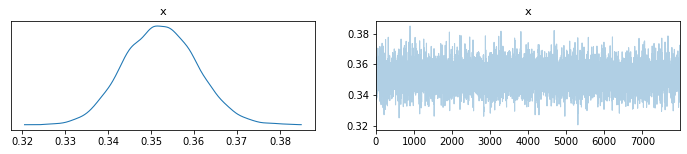

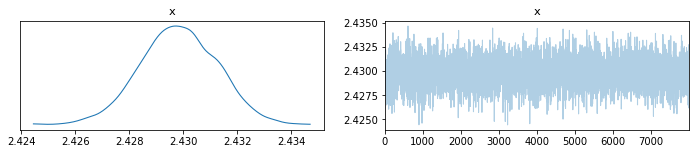

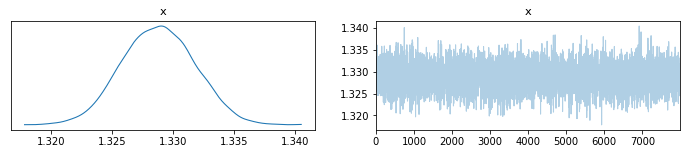

In [48]:
with(model_1):
    print('intercept')
    pm.plot_trace(trace_1['intercept'])
    print('trace')
    pm.plot_trace(trace_1['slope'])
    print('err_odr')
    pm.plot_trace(trace_1['err_odr'])

In [49]:
true_intercept = 0 
true_slope = 2.5
size = 10000

x_true = np.array(np.linspace(0,10,size))
y_true = true_intercept + true_slope * x_true

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)

with pm.Model() as model_2:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    intercept = pm.Normal('intercept', 0, err_param)
    slope = pm.Normal('slope', 0, err_param)
    y_pred = pm.Deterministic('y_pred', intercept + slope * x_lat)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace_2 = pm.sample(2000, tune=3000, chains=4, cores=4)

/var/folders/yg/lmz25_151h90wtbcfrdqjgjm0000gn/T/ipykernel_45103/1742172768.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_2 = pm.sample(2000, tune=3000, chains=4, cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, x_mu, err_param, err_odr]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 223 seconds.
The acceptance probability does not match the target. It is 0.6355965241039901, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7189854977585584, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6904804922167842, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.5479203238117553, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


intercept
slope
err_odr


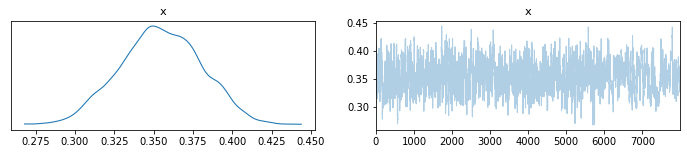

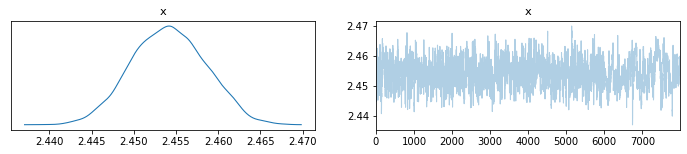

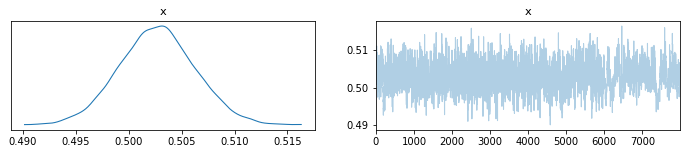

In [50]:
with(model_2):
    print('intercept')
    pm.plot_trace(trace_2['intercept'])
    print('slope')
    pm.plot_trace(trace_2['slope'])
    print('err_odr')
    pm.plot_trace(trace_2['err_odr'])

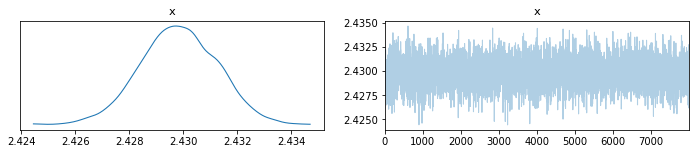

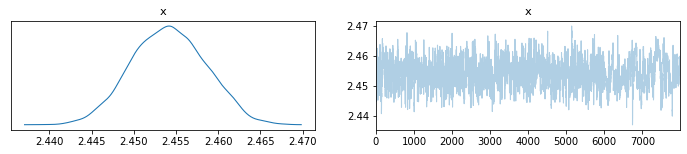

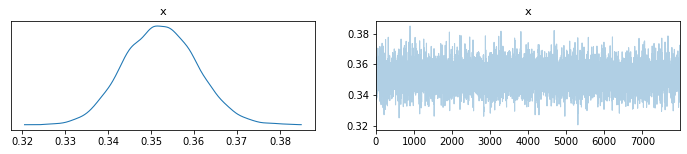

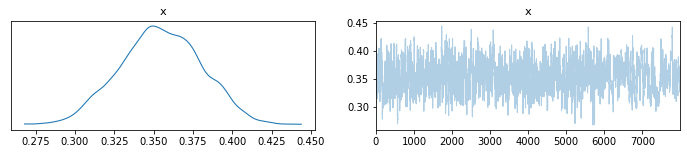

In [51]:
with(model_1):
    pm.plot_trace(trace_1['slope'])
with(model_2):
    pm.plot_trace(trace_2['slope'])
with(model_1):
    pm.plot_trace(trace_1['intercept'])
with(model_2):
    pm.plot_trace(trace_2['intercept'])

/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


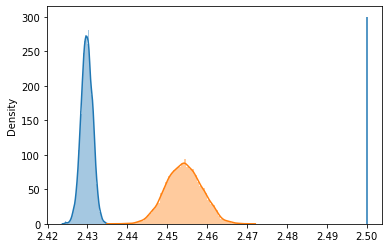

In [55]:
sb.distplot(trace_1['slope'])
sb.distplot(trace_2['slope'])
plt.vlines(x=true_slope, ymin=0, ymax=300)

In [56]:
true_intercept = 0 
true_slope = 2.5
size = 10000

x_true = np.array(np.linspace(0,10,size))
y_true = true_intercept + true_slope * x_true

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)

with pm.Model() as model_3:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    #intercept = pm.Normal('intercept', 0, err_param)
    slope = pm.Normal('slope', 0, err_param)
    y_pred = pm.Deterministic('y_pred', slope * x_lat)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace_3 = pm.sample(2000, tune=3000, chains=4, cores=4)

/var/folders/yg/lmz25_151h90wtbcfrdqjgjm0000gn/T/ipykernel_45103/2889095293.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_3 = pm.sample(2000, tune=3000, chains=4, cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, x_mu, err_param, err_odr]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 191 seconds.
The number of effective samples is smaller than 25% for some parameters.


/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` i

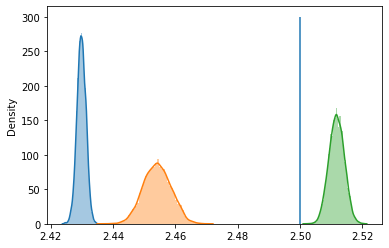

In [57]:
sb.distplot(trace_1['slope'])
sb.distplot(trace_2['slope'])
sb.distplot(trace_3['slope'])
plt.vlines(x=true_slope, ymin=0, ymax=300)

In [67]:
true_intercept = 0 
true_slope = 2.5
size = 10000

x_true = np.array(np.linspace(0,10, size))
y_true = true_intercept + true_slope * x_true
x2_true = np.random.choice(np.array(np.linspace(0,10, size)), size=size)

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)
x2 = x2_true + np.random.normal(loc=0, scale=0.5, size=size)

with pm.Model() as model_4:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    #intercept = pm.Normal('intercept', 0, err_param)
    x2_lat = pm.Normal('x2_mu', 0, 5., shape=x.shape[0])
    x2_obs = pm.Normal('x2_obs', mu=x2_lat, sd=err_odr, observed=x2, shape=x.shape[0])
    slope = pm.Normal('slope', 0, err_param)
    slope2 = pm.Normal('slope2', 0, err_param)
    y_pred = pm.Deterministic('y_pred', slope * x_lat + slope2 * x2_lat)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace_4 = pm.sample(2000, tune=3000, chains=4, cores=4)

/var/folders/yg/lmz25_151h90wtbcfrdqjgjm0000gn/T/ipykernel_45103/2653016149.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_4 = pm.sample(2000, tune=3000, chains=4, cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope2, slope, x2_mu, x_mu, err_param, err_odr]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 490 seconds.
The acceptance probability does not match the target. It is 0.6940889197107285, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


In [70]:
true_intercept = 0 
true_slope = 2.5
size = 10000

x_true = np.array(np.linspace(0,10, size))
y_true = true_intercept + true_slope * x_true
x2_true = np.random.choice(np.array(np.linspace(0,10, size)), size=size)

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)
x2 = x2_true + np.random.normal(loc=0, scale=0.5, size=size)

with pm.Model() as model_5:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    #intercept = pm.Normal('intercept', 0, err_param)
    #x2_lat = pm.Normal('x2_mu', 0, 5., shape=x.shape[0])
    #x2_obs = pm.Normal('x2_obs', mu=x2_lat, sd=err_odr, observed=x2, shape=x.shape[0])
    slope = pm.Normal('slope', 0, err_param)
    slope2 = pm.Normal('slope2', 0, err_param)
    y_pred = pm.Deterministic('y_pred', slope * x_lat + slope2 * x2_true)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace_5 = pm.sample(2000, tune=3000, chains=4, cores=4)

/var/folders/yg/lmz25_151h90wtbcfrdqjgjm0000gn/T/ipykernel_45103/3298438534.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_5 = pm.sample(2000, tune=3000, chains=4, cores=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope2, slope, x_mu, err_param, err_odr]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 222 seconds.
The acceptance probability does not match the target. It is 0.6239682852705041, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.701282116699738, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rubenmak/Projects/pydata_global_2021_attenuation_bias/venv/attenuation/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` i

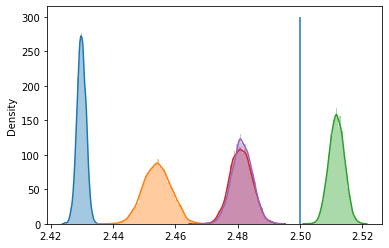

In [71]:
sb.distplot(trace_1['slope'])
sb.distplot(trace_2['slope'])
sb.distplot(trace_3['slope'])
sb.distplot(trace_4['slope'])
sb.distplot(trace_5['slope'])
plt.vlines(x=true_slope, ymin=0, ymax=300)

In [85]:
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0] + B[1]*x[0] + B[2]*x[1]

linear = odr.Model(f)

mydata = odr.RealData([x, x2], y)

myodr = odr.ODR(mydata, linear, beta0=[1., 2., 2.])

myoutput = myodr.run()

myoutput.pprint()

Beta: [-0.00835691  2.49967433  0.00557126]
Beta Std Error: [0.03543016 0.0046768  0.00461456]
Beta Covariance: [[ 4.97244257e-03 -4.34128103e-04 -4.19541087e-04]
 [-4.34128103e-04  8.66406229e-05  2.90123592e-07]
 [-4.19541087e-04  2.90123592e-07  8.43496913e-05]]
Residual Variance: 0.2524506773928058
Inverse Condition #: 0.049621818301403026
Reason(s) for Halting:
  Sum of squares convergence
